# Jobsheet 7
## Kelompok 6
### Aldin Ariel Pramudya (2141720233)
### Aryo Deva Saputra (2141720176)
### Muhammad Ega Rama Fernanda (2141720143)
Kelas : 3D

Prodi : D-IV Teknik Inormatika

Jurusan : Teknologi Inormasi

Politeknik Negeri Malang

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Fungsi Dilasi

In [5]:
def dilasi_citra(F,w):
#size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  SED= np.ones((w,w), dtype=np.uint8)
  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

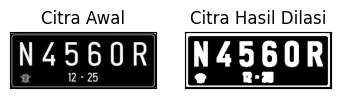

In [6]:
img_d= cv2.imread('/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 9/plat nomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 125, 200, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()


## Fungsi Dilasi Menggunakan Library

In [14]:
def dilate(image):

  # Buat kernel dilasi
  kernel = np.array([[0, 1, 0],
                     [1, 1, 1],
                     [0, 1, 0]], dtype=np.uint8)

  # Lakukan dilasi
  dilation = cv2.dilate(image, kernel, iterations=1)

  return dilation

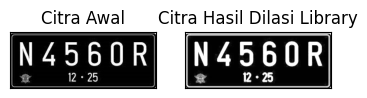

In [15]:
image = cv2.imread('/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 9/plat nomer.jpg',0)
dilated_image = dilate(image)
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi Library'), plt.xticks([]), plt.yticks([])
plt.show()

## Fungsi Erosi


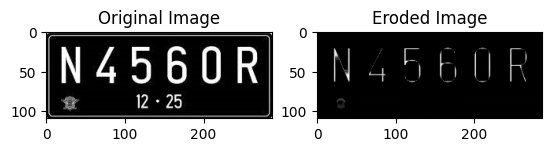

In [16]:
# Fungsi erosi
def erode(img, kernel):
    img_h, img_w = img.shape
    kernel_h, kernel_w = kernel.shape

    # Padding pada input image
    padded_img = np.zeros((img_h+kernel_h-1, img_w+kernel_w-1))
    padded_img[kernel_h//2:img_h+kernel_h//2, kernel_w//2:img_w+kernel_w//2] = img

    # Inisialisasi output image
    output = np.zeros(img.shape)

    # Iterasi citra dan terapkan minimum filter
    for i in range(img_h):
        for j in range(img_w):
            roi = padded_img[i:i+kernel_h, j:j+kernel_w]
            output[i,j] = np.min(roi)

    return output

# Citra input
img = cv2.imread('/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 9/plat nomer.jpg',0)

# Kernel
kernel = np.full((5,5), 1)

# Panggil fungsi erosi
eroded = erode(img, kernel)

# Tampilkan hasil
fig, axes = plt.subplots(1, 2)
axes[0].imshow(img, cmap='gray')
axes[0].set_title("Original Image")
axes[1].imshow(eroded, cmap='gray')
axes[1].set_title("Eroded Image")
plt.show()

## Fungsi Erosi Menggunakan Library

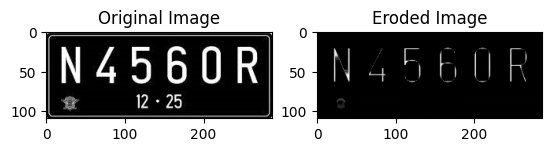

In [18]:
erosion = cv2.erode(img, kernel, iterations = 1)
ig, axes = plt.subplots(1, 2)
axes[0].imshow(img, cmap='gray')
axes[0].set_title("Original Image")
axes[1].imshow(erosion, cmap='gray')
axes[1].set_title("Eroded Image")
plt.show()

## Operasi Opening

### Opening Tanpa Library

In [65]:
def erosi_citra(F,k):
#size image
  m,n= F.shape

  #Generate structure element erosi (SE)
  SE= np.ones((k,k), dtype=np.uint8)
  constant= (k-1)//2

  imgE= np.zeros((m,n), dtype=np.uint8)

  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)

  return imgE


In [20]:
def dilate(img, kernel):

  m, n = kernel.shape
  y, x = img.shape

  # Padding pada input image
  pad_img = np.zeros((y+m-1, x+n-1))
  pad_img[m//2:y+m//2, n//2:x+n//2] = img

  # Inisialisasi output image
  output = np.zeros((y, x))

  for i in range(y):
    for j in range(x):

      # Area input image
      roi = pad_img[i:i+m, j:j+n]

      # Logika OR dengan kernel
      if (roi | kernel).any():
        output[i,j] = 1

  return output

In [21]:
def opening(img, kernel):
  eroded = erode(img, kernel)
  opening = dilate(eroded, kernel)
  return opening

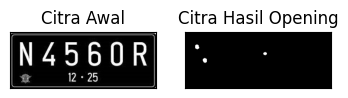

In [67]:
img_o= cv2.imread('/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 9/plat nomer.jpg',0) #
reto, thresho = cv2.threshold(img_o, 127, 225,cv2.THRESH_BINARY)
k=7
imgO = dilasi_citra(erosi_citra(thresho,k),k)
plt.subplot(131),plt.imshow(img_o,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgO,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

### Opening menggunakan Library

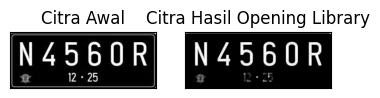

In [25]:
img = cv2.imread('/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 9/plat nomer.jpg',0)

kernel = np.ones((3,3))

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(opening, cmap='gray')
plt.title('Citra Hasil Opening Library'), plt.xticks([]), plt.yticks([])
plt.show()

## Dilasi Dengan Kernel Cross

### Kernel 3x3 Cross

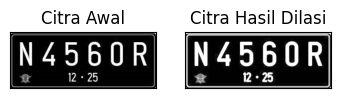

In [38]:
# Buat kernel 3x3
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)

img = cv2.imread('/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 9/plat nomer.jpg',0)

dilation = cv2.dilate(img,kernel,iterations = 1)
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(dilation, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

### Kernel 5x5 Cross

In [34]:
cross_5_kernel = np.array([[0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0],
                  [1, 1, 1, 1, 1],
                  [0, 0, 1, 0, 0],
                  [0, 0, 1, 0, 0]], dtype = np.uint8)

In [36]:
def dilasi_citra(F,w):
#size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  SED= np.ones((w,w), dtype=np.uint8)
  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

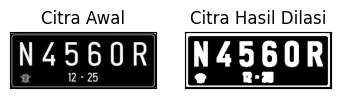

In [37]:
img_d= cv2.imread('/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 9/plat nomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 125, 200, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()

## Dilasi Dengan Kernel Circular

### Circular 3x3 & Circular 5X5

SED = Circle 3


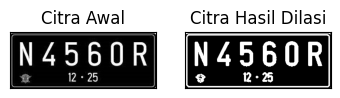

SED = Circle 5


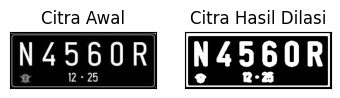

In [41]:
#Dilasi Circular SED
def dilasi_citra(F,w):
#size image
  p,q= F.shape
  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  SED= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(w,w))
  constant1= (w-1)//2
  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD
print('SED = Circle 3')
img_d= cv2.imread('/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 9/plat nomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)
plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

print('SED = Circle 5')
img_d= cv2.imread('/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 9/plat nomer.jpg ',0)
ret, thresh = cv2.threshold(img_d, 127, 225,
cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

## Erosi Dengan Kernel Rectangle

### Rectangel 3x5

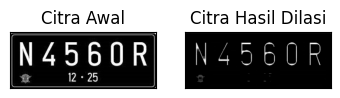

In [44]:
kernel = np.array([[1, 1, 1, 1, 1,],
                    [1, 1, 1, 1, 1,],
                    [1, 1, 1, 1, 1,]], dtype=np.uint8)

img = cv2.imread('/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 9/plat nomer.jpg',0)

eroded = cv2.erode(img,kernel,iterations = 1)
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(eroded, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()


### Rectangle 5x7

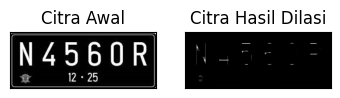

In [45]:
kernel = np.array([[1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1],], dtype=np.uint8)


img = cv2.imread('/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 9/plat nomer.jpg',0)

eroded = cv2.erode(img,kernel,iterations = 1)
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(eroded, cmap='gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()


## Erosi Dengan Kernel Line Vertical

SE = Line Vertikal 3


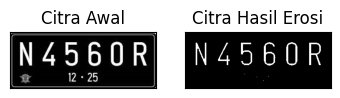

SE = Line Vertikal 5


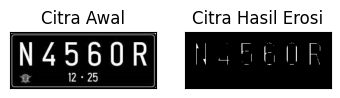

In [47]:
#Erosi Line Vertikal SE
def erosi_citra(F,k):
#size image
  m,n= F.shape
  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,k)) #SE line vertikal
  constant= (k-1)//2
  imgE= np.zeros((m,n), dtype=np.uint8)
  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product= temp*SE
      imgE[i,j]= np.min(product)

  return imgE
print('SE = Line Vertikal 3')
img_e= cv2.imread('/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 9/plat nomer.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225,
cv2.THRESH_BINARY)
k=3
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

print('SE = Line Vertikal 5')
img_e= cv2.imread('/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 9/plat nomer.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225,
cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

## Top Hat

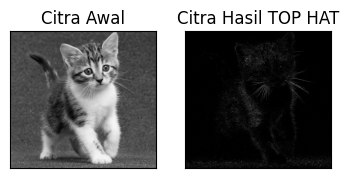

In [50]:
img = cv2.imread('/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 9/kitten01.jpg')
img_cat = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,filterSize)

tophat_img = cv2.morphologyEx(img_cat, cv2.MORPH_TOPHAT, kernel)

plt.subplot(131),plt.imshow(img_cat,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(tophat_img,cmap = 'gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()

## Black Hat

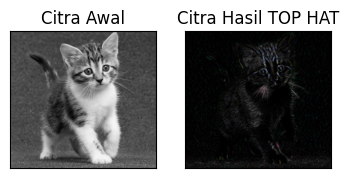

In [52]:
kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))

blackhat_img = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel2)

plt.subplot(131),plt.imshow(img_cat,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blackhat_img,cmap = 'gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()

## Skeleton

In [53]:
from skimage import filters
from skimage.morphology import skeletonize

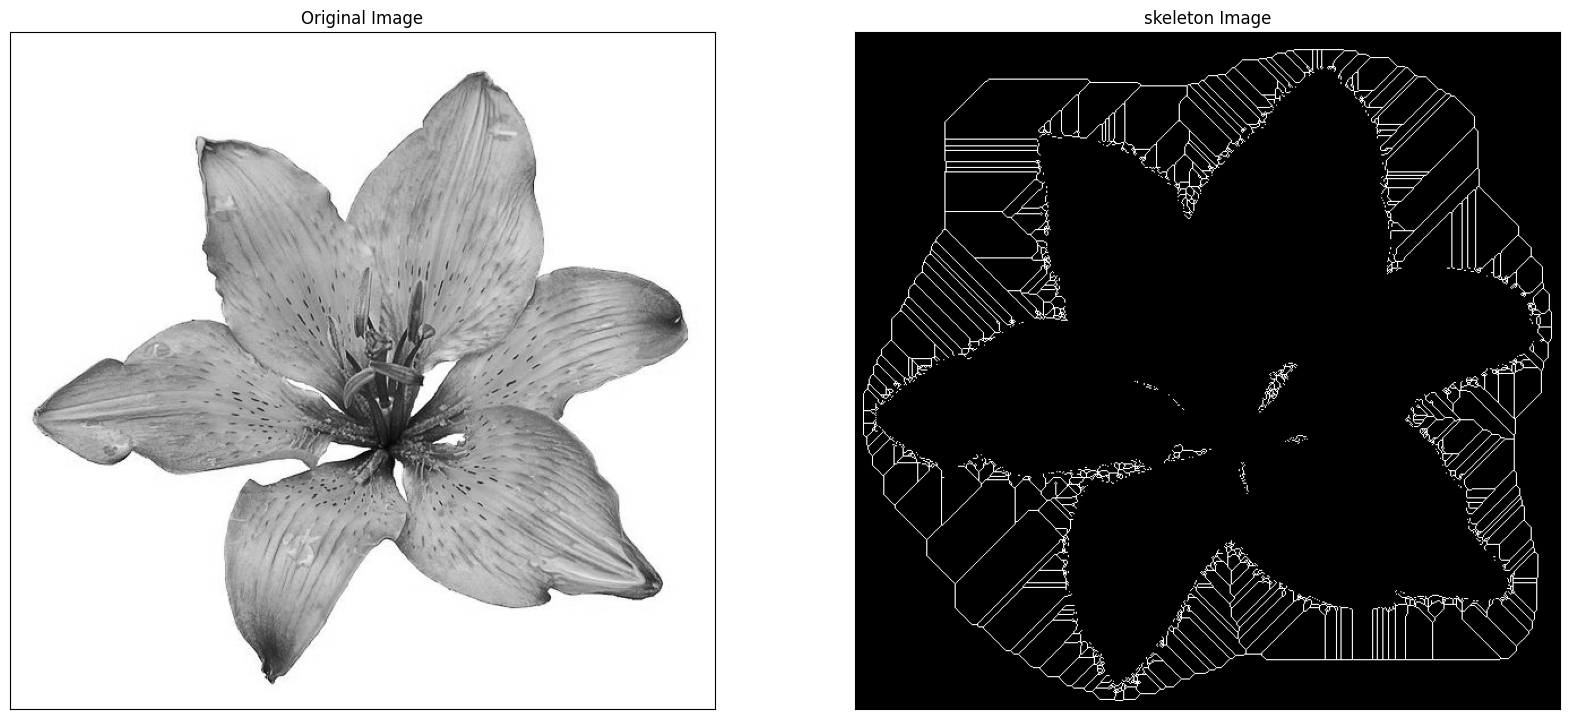

In [56]:
img = cv2.imread('/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 9/lily.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

binary = img_gray > filters.threshold_triangle(img_gray)

# true false to one
binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0

# skeletonize image
skeleton = skeletonize(binary_cp)

# print images
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img_gray,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(skeleton,cmap = 'gray')
plt.title('skeleton Image'), plt.xticks([]), plt.yticks([])
plt.savefig("binary and bin_skeleton.png")
plt.show()


## Skeleton Inverse

In [58]:
from skimage import io

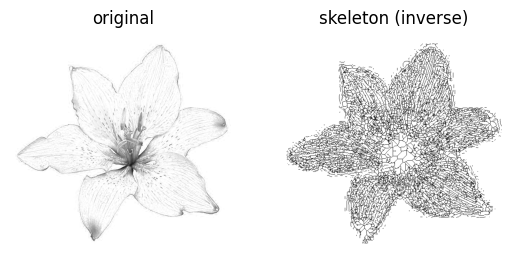

In [61]:
img = io.imread('/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 9/lily.jpg')[...,0]

binary = img < filters.threshold_triangle(img)

# skeletonize image
skeleton = skeletonize(binary)

# print images
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].set_axis_off()

# note the reversed colormap, gray_r
ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('skeleton (inverse)')
ax[1].set_axis_off()
plt.show()

## Thickening

In [62]:
from skimage import img_as_float
from skimage import io, color, morphology

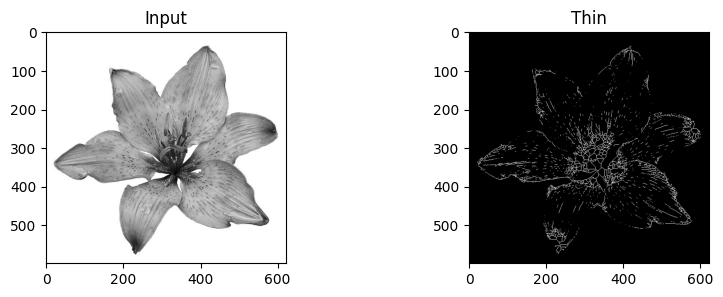

In [63]:
image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 9/lily.jpg')))
image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))

ax0.imshow(image, cmap='gray')
ax0.set_title('Input')
ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')
plt.savefig('/tmp/char_out.png')
plt.show()

## Tugas Pratikum

Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam
Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam
modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya
adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra
tersebut.


In [99]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import os
import random
from sklearn.cluster import KMeans
import math

In [100]:
directory = "/content/drive/MyDrive/Semester 5 Waduh/PCVK/Jobsheet 9/ktp"

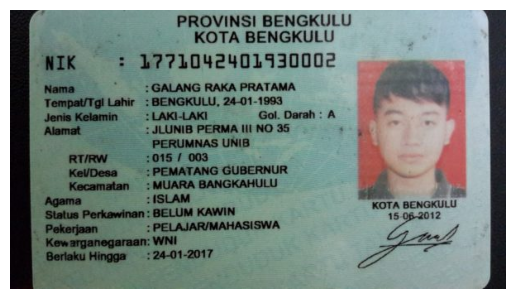

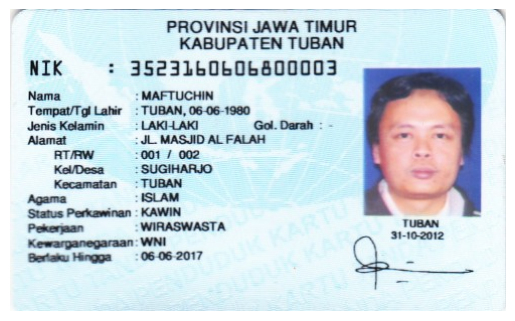

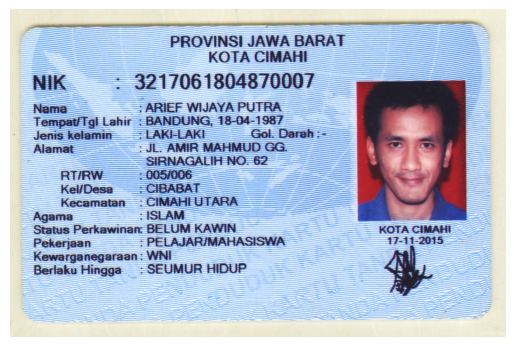

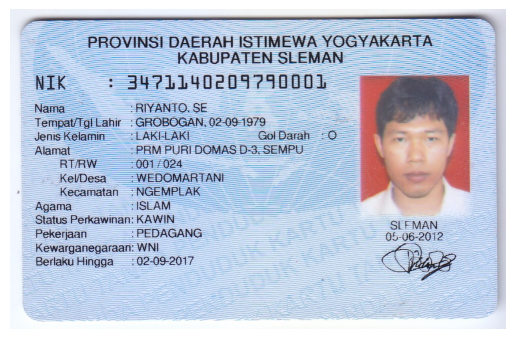

In [101]:
# Mengambil File dari variabel directory
image_files = [file for file in os.listdir(directory) if file.endswith((".jpg", ".jpeg", ".png"))]

# Loop melalui semua gambar dalam direktori
for img_file in image_files:
    img_path = os.path.join(directory, img_file)

    img = cv2.imread(img_path)

    # Tampilkan gambar
    plt.figure()
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()


### Erosi

<ipython-input-102-96c4424238b0>:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(img, cmap='gray')


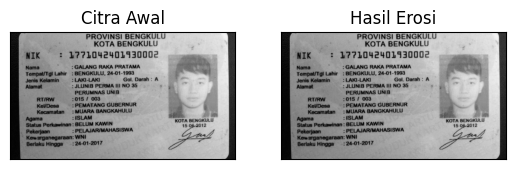

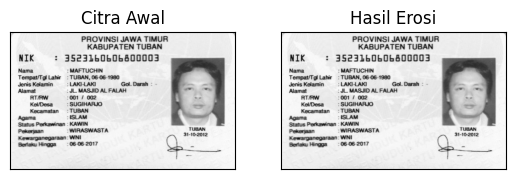

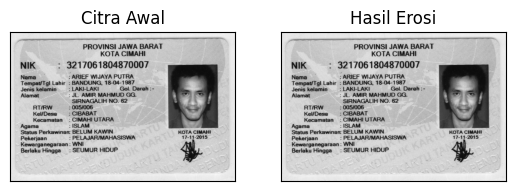

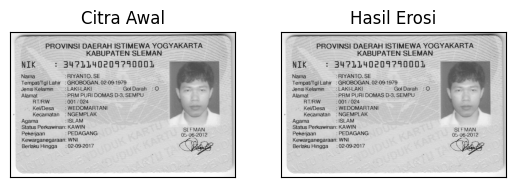

In [102]:
# Mengambil File dari variabel directory
image_files = [file for file in os.listdir(directory) if file.endswith((".jpg", ".jpeg", ".png"))]

# Loop melalui semua gambar dalam direktori
for img_file in image_files:
    img_path = os.path.join(directory, img_file)

    img = cv2.imread(img_path, 0)  # Baca gambar sebagai citra grayscale

    # Tentukan ukuran Structuring Element (SE) untuk Erosi (misalnya, square 3x3)
    k = 1
    SE = np.ones((k, k), np.uint8)

    # Operasi Erosi
    img_dilated = cv2.dilate(img, SE, iterations=1)

    # Tampilkan hasil Erosi
    plt.figure()
    plt.axis('off')
    plt.subplot(121), plt.imshow(img, cmap='gray')
    plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img_dilated, cmap='gray')
    plt.title('Hasil Erosi'), plt.xticks([]), plt.yticks([])
    plt.show()


### Dilasi

<ipython-input-103-0c725248a792>:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(img, cmap='gray')


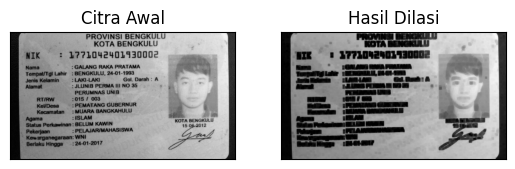

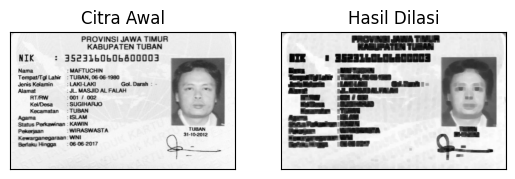

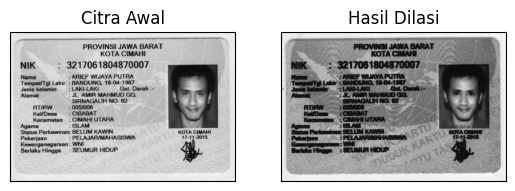

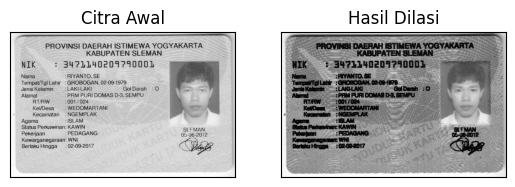

In [103]:
# Loop melalui semua gambar dalam direktori
for img_file in image_files:
    img_path = os.path.join(directory, img_file)

    img = cv2.imread(img_path, 0)  # Baca gambar sebagai citra grayscale

    # Tentukan ukuran Structuring Element (SE) untuk Dilasi (misalnya, square 3x3)
    k = 5
    SE = np.ones((k, k), np.uint8)

    # Operasi Dilasi
    img_eroded = cv2.erode(img, SE, iterations=1)

    # Tampilkan hasil Dilasi
    plt.figure()
    plt.axis('off')
    plt.subplot(121), plt.imshow(img, cmap='gray')
    plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img_eroded, cmap='gray')
    plt.title('Hasil Dilasi'), plt.xticks([]), plt.yticks([])
    plt.show()


### Opening

<ipython-input-104-df365f292143>:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(img, cmap='gray')


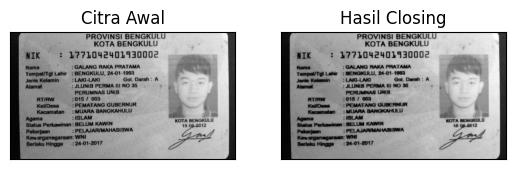

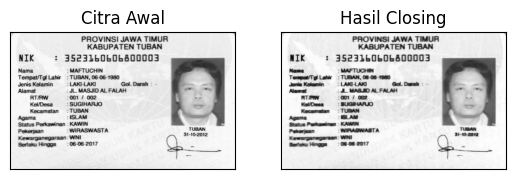

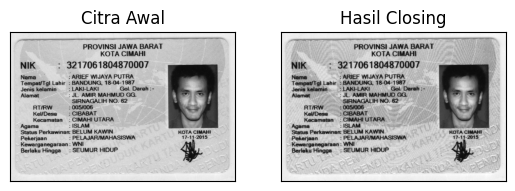

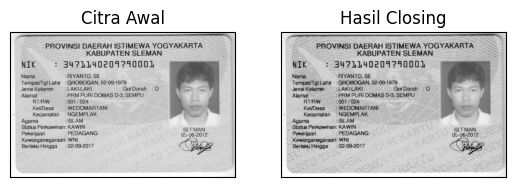

In [104]:
# Loop melalui semua gambar dalam direktori
for img_file in image_files:
    img_path = os.path.join(directory, img_file)

    img = cv2.imread(img_path, 0)  # Baca gambar sebagai citra grayscale

    # Tentukan ukuran Structuring Element (SE) untuk Closing (misalnya, square 3x3)
    k_Closing = 3
    SE_Closing = np.ones((k_Closing, k_Closing), np.uint8)

    # Operasi Closing
    img_opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, SE_Closing)

    # Tampilkan hasil Closing
    plt.figure()
    plt.axis('off')
    plt.subplot(121), plt.imshow(img, cmap='gray')
    plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img_opened, cmap='gray')
    plt.title('Hasil Closing'), plt.xticks([]), plt.yticks([])
    plt.show()


### Closing

<ipython-input-105-e6a6cbf6dfbb>:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(img, cmap='gray')


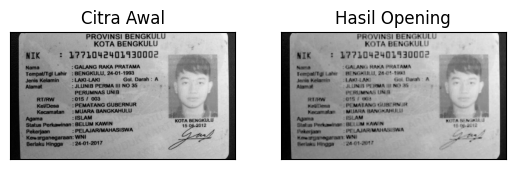

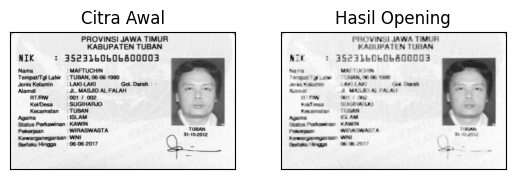

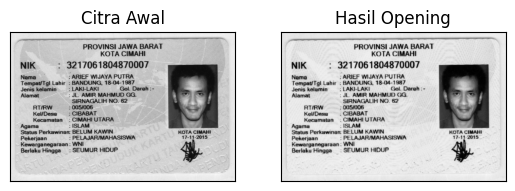

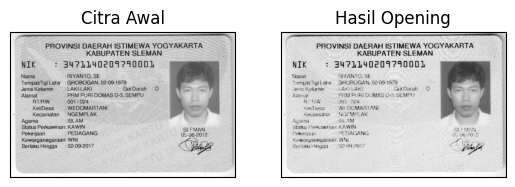

In [105]:
# Loop melalui semua gambar dalam direktori
for img_file in image_files:
    img_path = os.path.join(directory, img_file)

    img = cv2.imread(img_path, 0)  # Baca gambar sebagai citra grayscale

    # Tentukan ukuran Structuring Element (SE) untuk Opening (misalnya, square 3x3)
    k_Opening = 3
    SE_Opening = np.ones((k_Opening, k_Opening), np.uint8)

    # Operasi Opening
    img_closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, SE_Opening)

    # Tampilkan hasil Opening
    plt.figure()
    plt.axis('off')
    plt.subplot(121), plt.imshow(img, cmap='gray')
    plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img_closed, cmap='gray')
    plt.title('Hasil Opening'), plt.xticks([]), plt.yticks([])
    plt.show()
